# IA340 Mini Project

**Project Title:** Analysis of Crime Trends in Los Angeles (2020-Present)

## Research Question
What have been the primary trends in the overall volume of reported crime in Los Angeles since 2020, and what were the most prevalent crime categories during this period?

## Dataset Documentation
- **Source:** https://catalog.data.gov/dataset/crime-data-from-2020-to-present
- **Description:** This dataset contains records of reported crimes in Los Angeles, including incident dates, crime descriptions, and location data from the Los Angeles Police Department (LAPD).
- **Time Period:** 2020 - Present
- **Reason for Choice:** This dataset is the official source for crime statistics in Los Angeles and contains the necessary date and crime type information to answer the research question about trends and prevalence.

In [1]:
!pip install pandas boto3

import pandas as pd
import boto3
import io

S3_BUCKET_NAME = 'ia340-connor-jmu'
S3_FILE_KEY = 'Crime_Data_from_2020_to_Present.csv'

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
try:
    response = s3_client.get_object(Bucket=S3_BUCKET_NAME, Key=S3_FILE_KEY)
    df = pd.read_csv(io.BytesIO(response['Body'].read()))
    print("Crime data loaded successfully!")
    print("Columns in the dataset:")
    print(df.columns)

    df.head()
except Exception as e:
    print(f"Error loading data from S3: {e}")

Crime data loaded successfully!
Columns in the dataset:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [9]:
stolen_vehicles_df = df_clean[df_clean['Crm Cd Desc'] == 'VEHICLE - STOLEN']

print(f"Found {stolen_vehicles_df.shape[0]} reports of stolen vehicles.")
# Show the results of the query in a DataFrame
stolen_vehicles_df.head()

Found 115190 reports of stolen vehicles.


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month
12,202113531,09/06/2020 12:00:00 AM,2020-09-05,1500,21,Topanga,2149,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,19700 VANOWEN ST,NaN,34.1938,-118.5631,2020,9
31,201811813,05/28/2020 12:00:00 AM,2020-05-25,200,18,Southeast,1851,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,MENLO AV,130TH ST,33.9144,-118.2894,2020,5
39,201416348,08/30/2020 12:00:00 AM,2020-08-28,1200,14,Pacific,1453,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,4000 GLENCOE AV,NaN,33.9918,-118.4446,2020,8
54,201904694,01/16/2020 12:00:00 AM,2020-01-15,2130,19,Mission,1901,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,FOOTHILL,BALBOA,34.3193,-118.4871,2020,1
59,201513536,08/05/2020 12:00:00 AM,2020-08-04,730,15,N Hollywood,1557,1,510,VEHICLE - STOLEN,...,510.0,NaN,NaN,NaN,4900 CARTWRIGHT AV,NaN,34.1595,-118.3637,2020,8


In [7]:
df_clean = df.copy()

df_clean['DATE OCC'] = pd.to_datetime(df_clean['DATE OCC'])

print("Missing values in 'Crm Cd Desc':", df_clean['Crm Cd Desc'].isnull().sum())
df_clean.dropna(subset=['Crm Cd Desc'], inplace=True)

df_clean['Year'] = df_clean['DATE OCC'].dt.year
df_clean['Month'] = df_clean['DATE OCC'].dt.month

print("\nData cleaned successfully!")
df_clean[['DATE OCC', 'Crm Cd Desc', 'Year', 'Month']].head()

/tmp/ipykernel_8462/3482119629.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['DATE OCC'] = pd.to_datetime(df_clean['DATE OCC'])


Missing values in 'Crm Cd Desc': 0

Data cleaned successfully!


,DATE OCC,Crm Cd Desc,Year,Month
0,2020-11-07,THEFT OF IDENTITY,2020,11
1,2020-10-18,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2020,10
2,2020-10-30,THEFT OF IDENTITY,2020,10
3,2020-12-24,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,2020,12
4,2020-09-29,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2020,9


Matplotlib is building the font cache; this may take a moment.


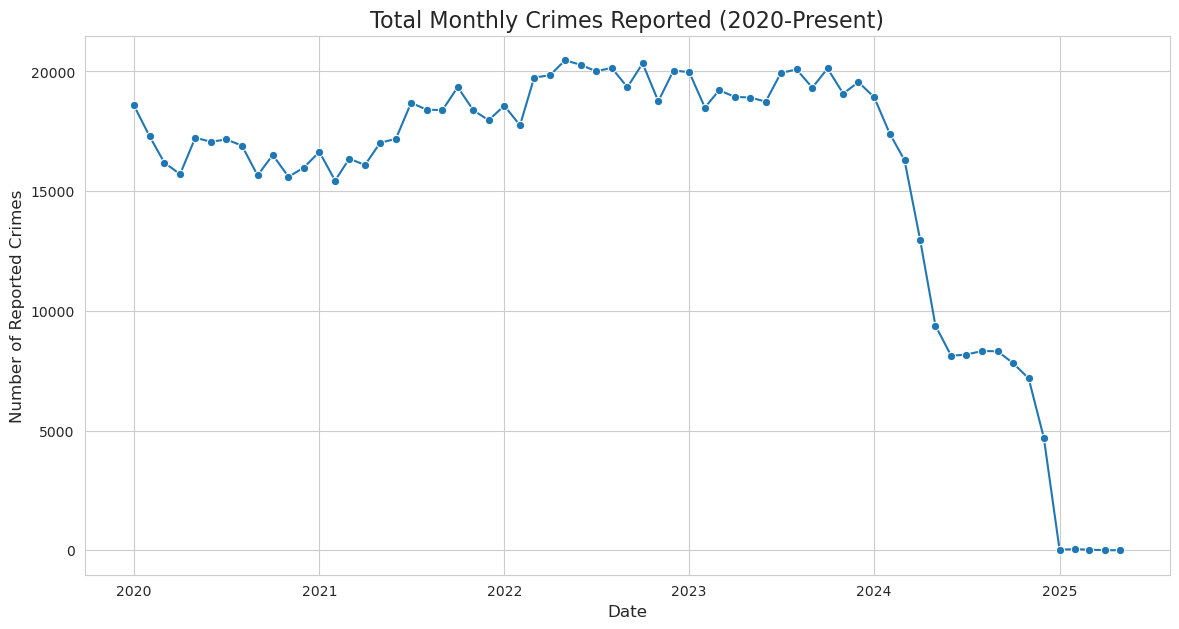

/tmp/ipykernel_8462/270688532.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Crime Type', data=top_crimes, palette='magma')


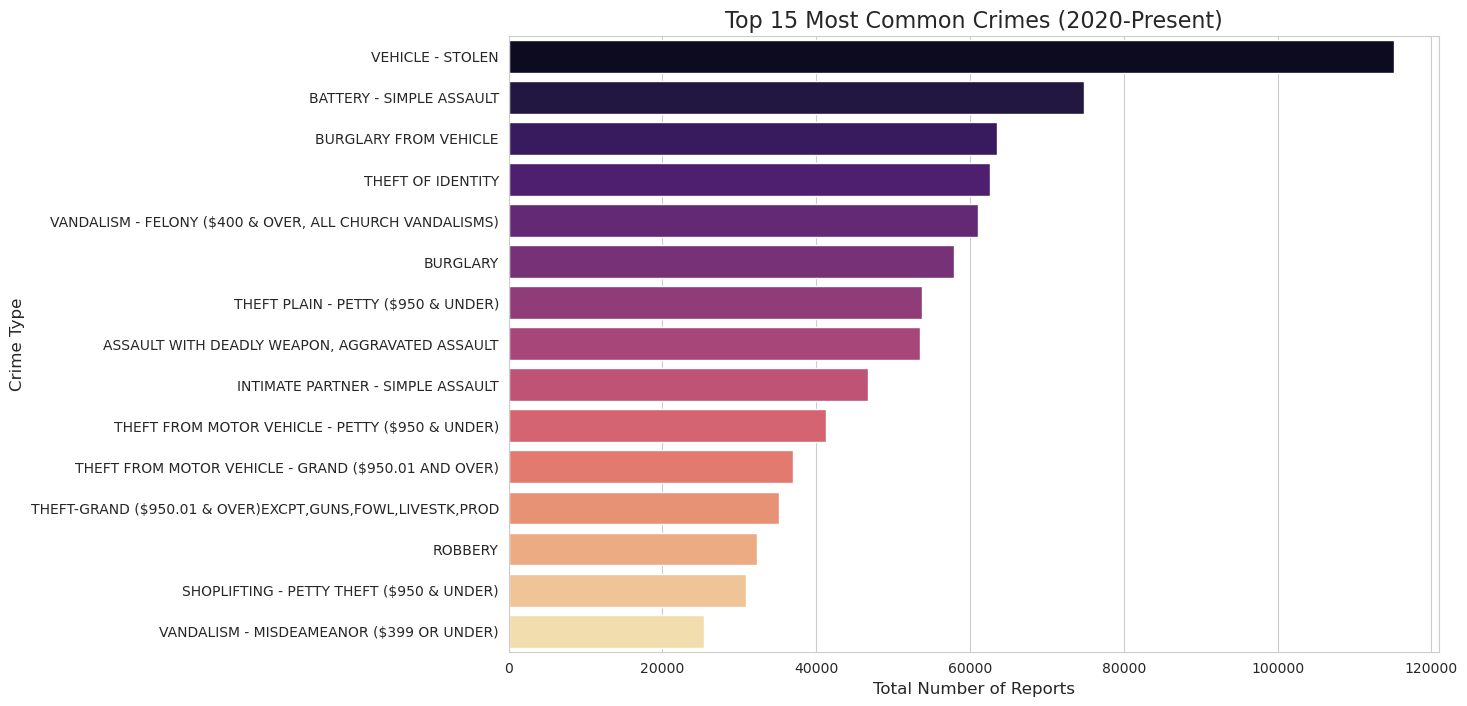

In [8]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


#### Monthly Crime Trends Since 2020

# Group by Year and Month and count the incidents
monthly_crimes = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')
# Create a date column for plotting
monthly_crimes['Date'] = pd.to_datetime(monthly_crimes.assign(DAY=1)[['Year', 'Month', 'DAY']])

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Crime Count', data=monthly_crimes, marker='o')
plt.title('Total Monthly Crimes Reported (2020-Present)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.show()

# Get the top 15 most common crime types
top_crimes = df_clean['Crm Cd Desc'].value_counts().nlargest(15).reset_index()
top_crimes.columns = ['Crime Type', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Crime Type', data=top_crimes, palette='magma')
plt.title('Top 15 Most Common Crimes (2020-Present)', fontsize=16)
plt.xlabel('Total Number of Reports', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.show()